In [3]:
!pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2022-06-02 20:32:59 +05:30)


In [14]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score
import pickle


time: 0 ns (started: 2022-06-02 22:06:05 +05:30)


**NOTE** : Please enter Category Names same as folder name

In [5]:
Categories=['Dog','Cat']
print("Type y to give categories or type n to go with classification of Cat and Dog");

while(True):
  check=input()
  if(check=='n' or check=='y'):
    break
  print("Please give a valid input (y/n)")
if(check=='y'):
  print("Enter How Many types of Images do you want to classify")
  n=int(input())
  Categories=[]
  print(f'please enter {n} names')
  for i in range(n):
    name=input()
    Categories.append(name)
  print(f"If not drive Please upload all the {n} category images in google collab with the same names as given in categories")

Type y to give categories or type n to go with classification of Cat and Dog
n
time: 1.73 s (started: 2022-06-02 20:33:48 +05:30)


Loading all the images and creating a DataFrame

If you have your images in your google drive, simply mount the google Drive and copy the path of the folder containing all the Category images and Change the datadir variable to that path

In [6]:
flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir='C:\\Users\\abhin\\Downloads\\Compressed\\kagglecatsanddogs_5340 (SVM)\\Pet'
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(50,50,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : Dog
loaded category:Dog successfully
loading... category : Cat
loaded category:Cat successfully


,0,1,2,3,4,5,6,7,8,9,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,Target
0,0.468196,0.459343,0.513040,0.572742,0.570752,0.598805,0.610428,0.613623,0.630415,0.542033,...,0.272838,0.302038,0.316619,0.267084,0.295378,0.321345,0.270818,0.300133,0.322184,0
1,0.605057,0.475797,0.363295,0.560838,0.400099,0.262247,0.483561,0.360116,0.240995,0.518013,...,0.962256,0.959880,0.894593,0.942122,0.941580,0.868513,0.929438,0.933012,0.855237,0
2,0.522604,0.394509,0.197903,0.510433,0.390031,0.214388,0.494987,0.447447,0.340025,0.497192,...,0.387481,0.368063,0.311129,0.388100,0.370591,0.313626,0.384928,0.368469,0.311304,0
3,0.759187,0.715963,0.700306,0.755402,0.707417,0.693343,0.753975,0.700121,0.687609,0.754674,...,0.321475,0.243820,0.199819,0.304377,0.235915,0.186917,0.318224,0.243225,0.209015,0
4,0.999731,0.999777,0.999764,0.990328,0.992098,0.991239,0.919984,0.926901,0.923675,0.858998,...,0.886662,0.886245,0.885254,0.972941,0.976785,0.975033,0.998567,0.999060,0.998865,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,0.432761,0.454636,0.468638,0.442237,0.458273,0.464553,0.479984,0.490706,0.500470,0.482301,...,0.148067,0.148329,0.108366,0.124755,0.129380,0.096637,0.140158,0.144137,0.119087,1
998,0.494961,0.442236,0.409952,0.493837,0.446845,0.415786,0.495529,0.457072,0.427445,0.477409,...,0.859181,0.812875,0.767465,0.518651,0.473643,0.453107,0.459707,0.408028,0.393229,1
999,0.498852,0.385039,0.354517,0.523963,0.398402,0.354927,0.531285,0.391425,0.357123,0.526437,...,0.378218,0.401692,0.457347,0.395188,0.418737,0.478756,0.404347,0.428867,0.489824,1
1000,0.056877,0.047716,0.029329,0.051247,0.043083,0.027953,0.045999,0.040099,0.030624,0.040876,...,0.124592,0.120736,0.085046,0.090830,0.092764,0.071393,0.126131,0.127805,0.081686,1


time: 1min 18s (started: 2022-06-02 20:34:04 +05:30)


Splitting the data into training and testing data

In [7]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully
time: 250 ms (started: 2022-06-02 20:35:30 +05:30)


This Part of code may take a while for training the data using SVC model

In [8]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 1, 'gamma': 0.001, 'kernel': 'poly'}

time: 1h 24min 54s (started: 2022-06-02 20:35:40 +05:30)


Predicting our testing data

In [58]:
y_pred=model.predict(x_test)
yhat_classes = (model.predict(x_test) > 0.5).astype("int32")
print("The predicted Data is :")
y_pred

The predicted Data is :


array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0])

time: 3.39 s (started: 2022-06-02 22:49:17 +05:30)


In [59]:
#y_pred = y_pred[:,0]       #2D to 1D array
#yhat_classes = yhat_classes[:,0]

time: 0 ns (started: 2022-06-02 22:49:45 +05:30)


In [60]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0])

time: 15 ms (started: 2022-06-02 22:49:48 +05:30)


In [61]:
#classification_report(y_pred,y_test)
print(f"The model accuracy is {accuracy_score(y_test,yhat_classes)*100}%")
print(f"The model precision is {precision_score(y_test,yhat_classes)*100}%")
print(f"The model recall is {recall_score(y_test,yhat_classes)*100}%")
print(f"The model f1 score is {f1_score(y_test,yhat_classes)*100}%")
print(f"The model auc score is {roc_auc_score(y_test,y_pred)*100}%")
#matrix = confusion_matrix(y_pred,y_test)
#print(matrix)

The model accuracy is 62.68656716417911%
The model precision is 63.541666666666664%
The model recall is 60.396039603960396%
The model f1 score is 61.92893401015228%
The model auc score is 62.698019801980195%
time: 15 ms (started: 2022-06-02 22:49:55 +05:30)


Using Pickle to save the model to disk

In [62]:
pickle.dump(model,open('img_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully
time: 375 ms (started: 2022-06-02 22:50:03 +05:30)


The Machine-Learning Based Model is Created Successfully. Now You can test for classification of any image which falls in the mentioned Categories

Testing of model :

Enter URL of Imagehttps://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Funny_dog.jpg/2560px-Funny_dog.jpg


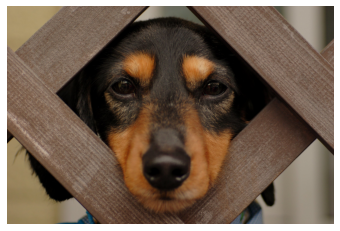

Dog = 57.44226317667533%
Cat = 42.55773682332467%
The predicted image is : Dog
Is the image a Dog ?(y/n)
y
Thank you for your feedback
time: 49.4 s (started: 2022-06-02 22:14:31 +05:30)


In [26]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.p','rb'))

url=input('Enter URL of Image')
img=imread(url)
plt.imshow(img)
plt.axis('off')
plt.show()
img_resize=resize(img,(50,50,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for your feedback")
